In [15]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
import tensorflow as tf

2023-03-14 15:38:06.733910: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 5s 1us/step


In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [8]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]

In [9]:
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [10]:
X_train.shape

(55000, 28, 28)

In [11]:
X_train.dtype

dtype('uint8')

In [12]:
X_train, X_valid, X_test = X_train/255., X_valid / 255., X_test / 255.

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train[0]]

'Ankle boot'

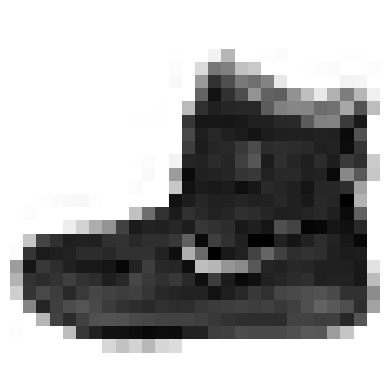

In [16]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

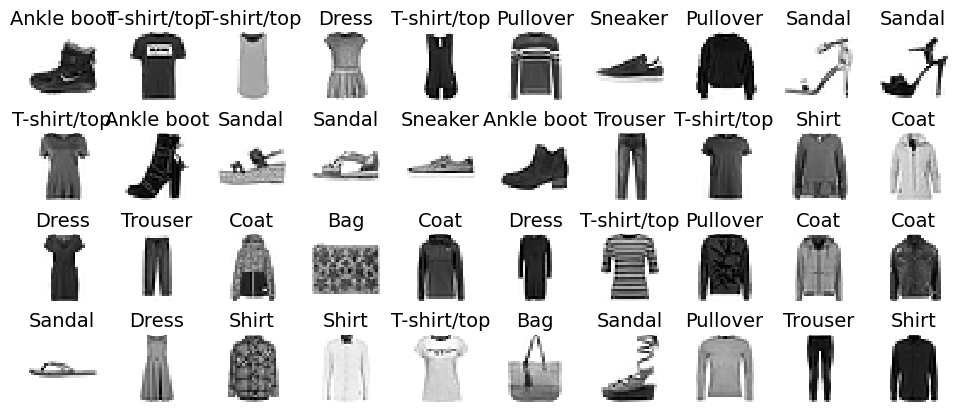

In [17]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [18]:
tf.random.set_seed(42)

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation = "relu"))
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2023-03-14 16:12:28.027959: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 16:12:28.028259: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [37]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
model.layers

In [22]:
model.get_layer('dense')

In [23]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [24]:
weights, biases = hidden1.get_weights()
weights

array([[-0.05093418,  0.01568862, -0.03346048, ..., -0.06193447,
         0.01946609, -0.06504141],
       [ 0.05714491,  0.0544071 , -0.02456953, ..., -0.02605329,
         0.02374221, -0.04868537],
       [-0.00522541, -0.06438846,  0.01903431, ...,  0.02405246,
        -0.03842601, -0.00443209],
       ...,
       [-0.02524969, -0.06605816, -0.03352158, ...,  0.0482981 ,
        -0.05812579, -0.02947875],
       [ 0.06897357, -0.00817509,  0.05716902, ...,  0.07432841,
         0.05229387,  0.0243516 ],
       [ 0.01245745, -0.01464992, -0.01731951, ..., -0.00089429,
         0.01322357,  0.03482758]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases.shape

(300,)

In [27]:
#compiling the model
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = "accuracy")

In [28]:
history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7077 - accuracy: 0.7691 - val_loss: 0.5010 - val_accuracy: 0.8286
Epoch 2/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4822 - accuracy: 0.8325 - val_loss: 0.4542 - val_accuracy: 0.8412
Epoch 3/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4364 - accuracy: 0.8466 - val_loss: 0.4197 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4115 - accuracy: 0.8559 - val_loss: 0.3935 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3909 - accuracy: 0.8633 - val_loss: 0.3884 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3745 - accuracy: 0.8676 - val_loss: 0.3930 - val_accuracy: 0.8654
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3627 - accuracy: 0.8705 - val_loss: 0.3690 - val_acc

In [29]:
import pandas as pd

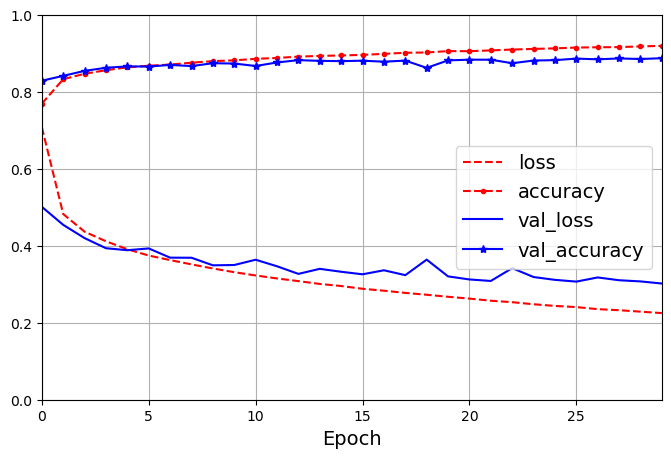

In [31]:
pd.DataFrame(history.history).plot(
figsize = (8,5), xlim = [0,29], ylim = [0,1], grid = True, xlabel= "Epoch",
style = ["r--", "r--.", "b-", "b-*"])
plt.show()

In [32]:
#evaluation

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3251 - accuracy: 0.8855


[0.3250997066497803, 0.8855000138282776]

In [33]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 55ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
import numpy as np
y_pred = y_proba.argmax(axis =1 )
y_pred

array([9, 2, 1])

In [35]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [36]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

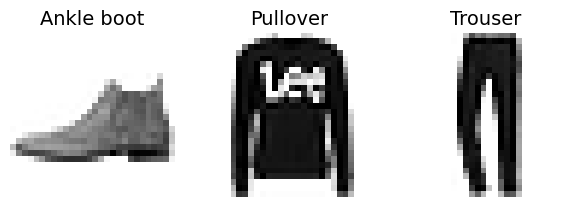

In [39]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()